# VCM-02 Internship Final Report

### Andyara Callegare
### oliveiracallegare@uni-potsdam.de


### Introduction

talk about enso/oni
talk about grace
talk about they can be related

South America in-situ measurements are not the most abundant, but over the last decades an increased number of remote sensors showed an unprecedented view of the region. 
The unique Gravity Recovery and Climate Experiment (GRACE) and its successor Gravity Recovery and Climate Experiment-Follow-On (GRACE-FO) have been orbiting the earth since 2002 with a unique way of using gravity to map water masses and their changes. Its variable Total Water Storage (TWS) change is defined as changes in water stored on the surface (e.g., lakes and reservoirs, rivers, and snow water equivalent), over the entire soil profile, and in groundwater (Long et al., 2015). 
A strong relationship between these datasets is expected, but in this study, we raised a few research questions: 

a) Does ENSO signals can be represented in two major basins in south america?; 
b) can extreme events cbe related?; 
c) Is there a time lag between precipitation and changes in TWS?

### Dataset

The study area comprehends the 2 biggest major river basins from South America, Amazon and Rio de La Plata, shown in Figure 1. 
The geometry was extracted from the WMO Basins 3rd, revised and extended edition 2020, available at https://www.bafg.de/GRDC/EN/02_srvcs/22_gslrs/223_WMO/wmo_regions_node.html#doc2763412bodyText7, the major basins were calculated by dissolving the ‘WMOBB_BASI’ attribute and summoning the ‘Shape_Area’. 

Amazon has aproximatelly 4.9 M km2, followed by Rio de La Plata with 3.0 M km2.



The Gravity Recovery and Climate Experiment (GRACE) and the Gravity Recovery and Climate Experiment Follow-On (GRACE-FO) missions are a partnership between NASA and the German Research Centre for Geosciences (GFZ). GRACE-FO, 2018- onwards,  is a successor to the original GRACE mission that orbited the earth from 2002-2017. These satellites map the gravity field, and since the surface changes at a very slow rate in comparison with water, these monthly changes are mostly attributed to water moving over and below the surface and on the oceans. Data was acquired from the PO.DAAC Drive (https://podaac-tools.jpl.nasa.gov/drive/files/allData/grace/L3/land_mass/RL06/v03/ and https://podaac-tools.jpl.nasa.gov/drive/files/allData/gracefo/L3/land_mass/RL06/v03/) for all the different centres' solutions processing: Center for Space Research (CSR), the Jet Propulsion Laboratory (JPL) and GFZ. The monthly data has a spatial resolution of 1° latitude x 1°longitude for all the landmasses. The variable total water storage anomalies (TWS) represents the anomalies of the sums the total of the water mass contained in different hydrological reservoirs, including surface, soil moisture, groundwater, and snowpack component (Hasan et al., 2019). 
A spatial sum for the area inside of the shapefile (and individual geometries) was performed, resulting in a time series of 163 months for GRACE, starting from April 2002 to June 2017; and for GRACE-FO a time series of 31 months, starting from June 2018 to February 2021. 
To describe the spatial pattern of the datasets the principal component analysis (PCA) was performed, the first mode describes the most dominant part of the signal (Abelen et al., 2015), the computation was done for 5 modes for the whole period downloaded from the datasets. The time series for each basin was calculated by summoning all the values inside of the selected geometry.
Then a z-score normalization was performed, so all the datasets can have the same range, without loss of signal information. And missing values were interpolated by a quadratic function. To find the time lag between TRMM and GRACE time series a Pearson Correlation Coefficient is performed by lagging the GRACE datasets month by month until 36 months forwards


### Methods

### Results

### Discussion

### Conclusions and outlook

### Step 1 - Download GRACE and GRACE-FO

#### GRACE and GRACE-FO Level-3 RL06 Land Water-Equivalent-Thickness Surface-Mass Anomaly 

Description: 
The monthly land mass grids contain water mass anomalies given as equivalent water thickness derived from GRACE & GRACE-FO time-variable gravity observations during the specified timespan, and relative to the specified time-mean reference period. The Equivalent water thickness represents the total terrestrial water storage anomalies from soil moisture, snow, surface water (incl. rivers, lakes, reservoirs etc.), as well as groundwater and aquifers. A glacial isostatic adjustment (GIA) correction has been applied, and standard corrections for geocenter (degree-1), C20 (degree-20) and C30 (degree-30) are incorporated. Post-processing filters have been applied to reduce correlated errors. Version 03 (v03) of the terrestrial water storage data uses updated and consistent C20 and Geocenter corrections (i.e., Technical Notes TN-14 and TN-13).Data grids are provided in ASCII/netCDF/GeoTIFF formats. For the RL06 version, all GRACE products in the ASCII format have adopted the YAML encoding header, which is in full compliance with the PO.DAAC metadata best practices.

##### Version: 
RL06 v03

##### Coverage:
Region: GLOBAL

North Bounding Coordinate: 89.5 degrees

South Bounding Coordinate: -89.5 degrees

West Bounding Coordinate: -180 degrees

East Bounding Coordinate: 180 degrees


##### Resolution:
Spatial Resolution: 1 degrees (Latitude) x 1 degrees (Longitude)

Temporal Resolution: ~1 Month (2002-04-18 to 2017-06-10 for GRACE, and 2018-06-16 - 2021-02-15 for GRACE-FO)

##### Projection:
Projection Type: Gridded

Ellipsoid: WGS 84

#####  Data Provider:
Publisher: TELLUS

Creator: Felix Landerer

Release Place: JPL

Release Date: 2020-Jan-22

Resource: https://doi.org/10.1029/2011WR011453


##### Download 
via PO.DAAC Drive using earthdata login

https://podaac-tools.jpl.nasa.gov/drive/files/allData/tellus/L3/grace/land_mass/RL06/v03 (~2,02 GB)

https://podaac-tools.jpl.nasa.gov/drive/files/allData/tellus/L3/gracefo/land_mass/RL06/v03 (~384,5 MB)

example of wget: 

wget --user=USER --password=PASSWORD -r https://podaac-tools.jpl.nasa.gov/drive/files/allData/grace

wget --user=USER --password=PASSWORD -r https://podaac-tools.jpl.nasa.gov/drive/files/allData/gracefo

USER and PASSWORD from Earthdata API credentials

### Step 2 - Open GRACE + GRACE-FO

Open data and merge as a single dataset using xarray (http://xarray.pydata.org/en/stable/).
The time between GRACE and GRACE-FO (06-2017 to 06-2018) is left empty.
No interpolation will be performed during this period because it's 11 months, too long for a realiable output. Other studies ***** cite the motherfucker that taylor suggests that lwe_thickness from both missions can be treated as one continuous variable.

In [1]:
# import packages
import glob
import xarray as xr
from tqdm import tqdm
import numpy as np

In [2]:
# GRACE
list_gr_csr = glob.glob('../data/external/grace/land_mass/RL06/v03/CSR/*.nc')
list_gr_csr.sort()
gr_csr = xr.open_mfdataset(list_gr_csr,combine='by_coords')

list_gr_jpl = glob.glob('../data/external/grace/land_mass/RL06/v03/JPL/*.nc')
list_gr_jpl.sort()
gr_jpl = xr.open_mfdataset(list_gr_jpl,combine='by_coords')

list_gr_gfz = glob.glob('../data/external/grace/land_mass/RL06/v03/GFZ/*.nc')
list_gr_gfz.sort()
gr_gfz = xr.open_mfdataset(list_gr_gfz,combine='by_coords')

<xarray.Dataset>
Dimensions:        (bounds: 2, lat: 180, lon: 360, time: 163)
Coordinates:
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time           (time) datetime64[ns] 2002-04-18 ... 2017-06-10T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    lat_bounds     (time, lat, bounds) float64 dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lon_bounds     (time, lon, bounds) float64 dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    time_bounds    (time, bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/59)
    _NCProperties:              version=1|netcdflibversion=4.6.1|hdf5libversi...
    Metadata_Conventions:       CF-1.6
    Conventions:                CF-1.6
    standard_name_vocabulary:   CF-1.6
    title

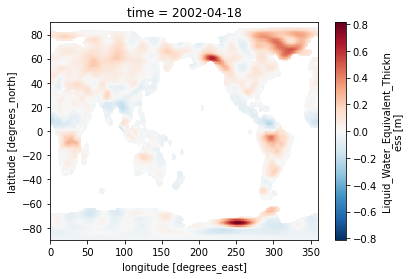

In [3]:
# check file
print(gr_csr)

gr_csr.lwe_thickness[0].plot()

Everything is alright with this file: coordinates are ok, lwe_thickness is whitin range, and time is also correct.
xr.open_mfdataset performed as expected.
Longitude convention for this file goes from 0 to 360. I'll change to -180 to 180 later.

In [4]:
# GRACE-FO
list_gf_csr = glob.glob('../data/external/gracefo/land_mass/RL06/v03/CSR/*.nc')
list_gf_csr.sort()
gf_csr_datsets=[]
for datefile in tqdm(list_gf_csr):
    file = xr.open_dataset(datefile)
    gf_csr_datsets.append(file)
gf_csr = xr.merge(gf_csr_datsets)

list_gf_jpl = glob.glob('../data/external/gracefo/land_mass/RL06/v03/JPL/*.nc')
list_gf_jpl.sort()
gf_jpl_datsets=[]
for datefile in tqdm(list_gf_jpl):
    file = xr.open_dataset(datefile)
    gf_jpl_datsets.append(file)
gf_jpl = xr.merge(gf_jpl_datsets)

list_gf_gfz = glob.glob('../data/external/gracefo/land_mass/RL06/v03/GFZ/*.nc')
list_gf_gfz.sort()
gf_gfz_datsets=[]
for datefile in tqdm(list_gf_gfz):
    file = xr.open_dataset(datefile)
    gf_gfz_datsets.append(file)
gf_gfz = xr.merge(gf_gfz_datsets)


100%|██████████| 31/31 [00:00<00:00, 65.76it/s]


<xarray.Dataset>
Dimensions:        (bounds: 2, lat: 312, lon: 520, time: 31)
Coordinates:
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 88.5 89.5
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 358.5 358.5 359.5 359.5
  * time           (time) datetime64[ns] 2018-06-16 2018-07-10 ... 2021-02-15
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 0.05402 0.05409 0.05417 ... nan nan
    lat_bounds     (lat, bounds) float64 -90.0 -89.0 -89.0 ... 89.0 89.0 90.0
    lon_bounds     (lon, bounds) float64 0.0 1.0 1.0 2.0 ... 360.0 359.0 360.0
    time_bounds    (time, bounds) datetime64[ns] 2018-06-01 ... 2021-03-01


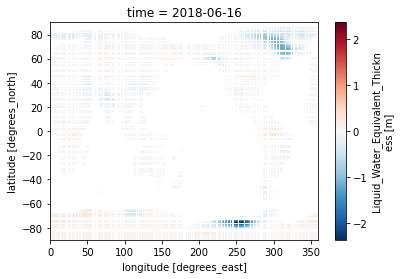

In [5]:
# check file
print(gf_csr)

gf_csr.lwe_thickness[0].plot()

In [6]:
print(gf_csr.lat.values[0:9])

print(gf_csr.lon.values[0:9])

[-89.5 -88.5 -87.5 -86.5 -85.5 -85.5 -84.5 -84.5 -83.5]
[0.5 1.5 2.5 3.5 4.5 5.5 5.5 6.5 6.5]


Thif file has some weird behaviour going on, the coordinates are striped, the dimention of the value is way greater than for each individual file.
For each indidual file it was expected a grid of 180 x 360, but the merged file returned 312 x 520. 
xr.open_mfdataset is repeating some coordinates while performing the merge. 
One way to fix this behaviour is opening each file indivdually and appending to an empty dataframe and then format to a netcdf file. This operation is gonna be performed for GRACE and GRACE-FO datasets, returning one single unique file for each center solution.



In [7]:
# to correct that error files are gonna be open one by one merged 
# CRS
list_gr_csr = glob.glob('../data/external/grace/land_mass/RL06/v03/CSR/*.nc')
list_gr_csr.sort()

list_gf_csr = glob.glob('../data/external/gracefo/land_mass/RL06/v03/CSR/*.nc')
list_gf_csr.sort()

list_csr = list_gr_csr + list_gf_csr


data = xr.open_dataset(list_csr[0])

nc = np.zeros([len(list_csr), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_csr), dtype='datetime64[s]')
for i in tqdm(range(0,len(list_csr))):
    data = xr.open_dataset(list_csr[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

## create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
csr = var.to_dataset(name = 'lwe_thickness')
csr['lon'].attrs = data.lon.attrs
csr['lat'].attrs = data.lat.attrs
csr['time'].attrs = data.time.attrs
csr['lwe_thickness'].attrs = data.lwe_thickness.attrs


# JPL
list_gr_jpl = glob.glob('../data/external/grace/land_mass/RL06/v03/JPL/*.nc')
list_gr_jpl.sort()

list_gf_jpl = glob.glob('../data/external/gracefo/land_mass/RL06/v03/JPL/*.nc')
list_gf_jpl.sort()

list_jpl = list_gr_jpl + list_gf_jpl


data = xr.open_dataset(list_jpl[0])

nc = np.zeros([len(list_jpl), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_jpl), dtype='datetime64[s]')
for i in tqdm(range(0,len(list_jpl))):
    data = xr.open_dataset(list_jpl[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

## create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
jpl = var.to_dataset(name = 'lwe_thickness')
jpl['lon'].attrs = data.lon.attrs
jpl['lat'].attrs = data.lat.attrs
jpl['time'].attrs = data.time.attrs
jpl['lwe_thickness'].attrs = data.lwe_thickness.attrs

# GFZ
list_gr_gfz = glob.glob('../data/external/grace/land_mass/RL06/v03/GFZ/*.nc')
list_gr_gfz.sort()

list_gf_gfz = glob.glob('../data/external/gracefo/land_mass/RL06/v03/GFZ/*.nc')
list_gf_gfz.sort()

list_gfz = list_gr_gfz + list_gf_gfz


data = xr.open_dataset(list_gfz[0])

nc = np.zeros([len(list_gfz), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_gfz), dtype='datetime64[s]')
for i in tqdm(range(0,len(list_gfz))):
    data = xr.open_dataset(list_gfz[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

## create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
gfz = var.to_dataset(name = 'lwe_thickness')
gfz['lon'].attrs = data.lon.attrs
gfz['lat'].attrs = data.lat.attrs
gfz['time'].attrs = data.time.attrs
gfz['lwe_thickness'].attrs = data.lwe_thickness.attrs

100%|██████████| 194/194 [00:02<00:00, 87.15it/s]


<xarray.Dataset>
Dimensions:        (lat: 180, lon: 360, time: 194)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-18 ... 2021-02-15
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    lwe_thickness  (time, lat, lon) float64 -0.02797 -0.02799 -0.028 ... nan nan


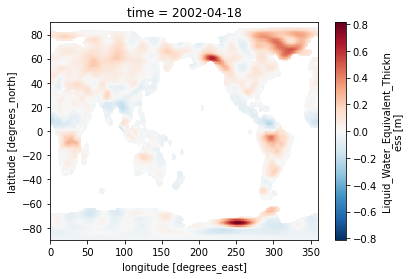

In [8]:
# check file
print(csr)

csr.lwe_thickness[0].plot()

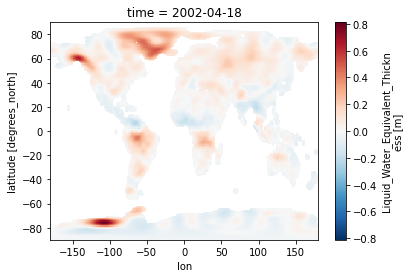

In [9]:
# convert longitude to -180 180 range
csr = csr.assign_coords(lon=(((csr.lon + 180) % 360) - 180)).sortby('lon')
jpl = jpl.assign_coords(lon=(((jpl.lon + 180) % 360) - 180)).sortby('lon')
gfz = gfz.assign_coords(lon=(((gfz.lon + 180) % 360) - 180)).sortby('lon')

# plot
csr.lwe_thickness[0].plot()

Now, this file has the correct dimentions, lwe_thickness is whitin range, and the time is also correct.
The files are gonna be saved to avoid reprocessing.

In [10]:
# save files
csr.to_netcdf('../data/processed/crs.nc') #golbal dataset
jpl.to_netcdf('../data/processed/jpl.nc') #golbal dataset
gfz.to_netcdf('../data/processed/gfz.nc') #golbal dataset

### Step 3 - Analyse lwe_thickness

- what's lwe_thickness
- what can this represent

- world sum 
- pca globally?
- world analysys

In [11]:
# import 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 
import pandas as pd

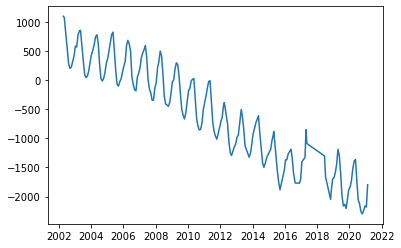

In [12]:
result_crs = csr.lwe_thickness.sum(dim=['lat','lon'], skipna=True)
plt.plot(result_crs.time, result_crs.values)

In [13]:
df = pd.DataFrame(
    {'time': result_crs.time.values,
     'lwe_thickness': result_crs.values
    })


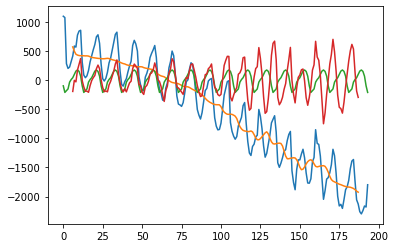

In [14]:
result_df = seasonal_decompose(df['lwe_thickness'], model='additive', period=12) # additive because the aplitude is the same

plt.plot(result_df.observed)
plt.plot(result_df.trend)
plt.plot(result_df.seasonal)
plt.plot(result_df.resid)


Where is all the water going?


### Step 4 - Download ONI
Cold & Warm Episodes by Season

 
Notice: This page is updated automatically on the first Thursday of each month. Because of the high frequency filter applied to the ERSSTv5 data (Huang et al. 2017, J.Climate), ONI values may change up to two months after the initial "real time" value is posted. Therefore, the most recent ONI values should be considered an estimate.

DESCRIPTION: Warm (red) and cold (blue) periods based on a threshold of +/- 0.5oC for the Oceanic Niño Index (ONI) [3 month running mean of ERSST.v5 SST anomalies in the Niño 3.4 region (5oN-5oS, 120o-170oW)], based on centered 30-year base periods updated every 5 years.

For historical purposes, periods of below and above normal SSTs are colored in blue and red when the threshold is met for a minimum of 5 consecutive overlapping seasons. The ONI is one measure of the El Niño-Southern Oscillation, and other indices can confirm whether features consistent with a coupled ocean-atmosphere phenomenon accompanied these periods.

https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

### Open ONI

In [15]:
# load packages
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 
import pandas as pd

In [16]:
oni = pd.read_csv('../data/external/oni/oni.ascii.txt', sep = '\s+')

In [17]:
# transform seasonal to datetime
import datetime

# define function to translate central month as datetime month, day ios fixed to 15
def oni2datetime(SEAS,yy):
    if SEAS =='DJF':
        mm = 1
    elif SEAS == 'JFM':
        mm = 2
    elif SEAS == 'FMA':
        mm = 3
    elif SEAS == 'MAM':
        mm = 4
    elif SEAS == 'AMJ':
        mm = 5
    elif SEAS == 'MJJ':
        mm = 6
    elif SEAS == 'JJA':
        mm = 7
    elif SEAS == 'JAS':
        mm = 8
    elif SEAS == 'ASO':
        mm = 9
    elif SEAS == 'SON':
        mm = 10
    elif SEAS == 'OND':
        mm = 11
    elif SEAS == 'NDJ':
        mm = 12

    return datetime.datetime(yy,mm,15)

# apply function
dates = []
for i in iter(range(0,len(oni))):
    dates.append(oni2datetime(oni.SEAS[i],oni.YR[i]))

oni['dates'] = dates

# reindex to datetime
oni.index = oni.dates

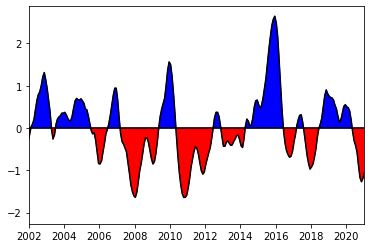

In [36]:

plt.plot(oni.index, oni.ANOM, color = 'k')

plt.xlim(datetime.datetime(2002,1,1), datetime.datetime(2021,1,1))
plt.axhline(y=0, color = 'k')

plt.fill_between(oni.index, oni.ANOM, 0,
                 where=(oni.ANOM <0),
                color='r', interpolate=True)
plt.fill_between(oni.index, oni.ANOM, 0,
                 where=(oni.ANOM > 0),
                 color='b', interpolate=True)


In [37]:
# extract region of interest : South America - Amazon Basin
import geopandas as gpd
from shapely.geometry import Polygon

# open file
world_basins = gpd.read_file('../data/external/wmo_basins_shp/wmobb_basins.shp')

# select attributes
world_basins = world_basins[['REGNAME','WMOBB_BASI', 'geometry', 'Shape_Area']]

# get only SA basins
SA_basins_minor = world_basins[world_basins['REGNAME'] == "South America"] 

# dissolve to only the major basins
SA_basins = SA_basins_minor.dissolve(by='WMOBB_BASI', aggfunc='sum') # function sum to get all the area of the basins

# organize as descending order of area
SA_basins.sort_values(by=['Shape_Area'], inplace=True, ascending=False)

# save file
SA_basins.to_file('basins_dissolved.shp')

In [38]:
# open saved file
SA_basins = gpd.read_file('basins_dissolved.shp')

Text(104.88502090077881, 0.5, 'latitude')

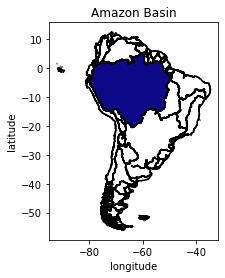

In [39]:
import matplotlib.pyplot as plt 

# plot
fig, ax = plt.subplots(1)
SA_basins[0:1].plot(ax=ax, column='WMOBB_BASI', cmap='plasma', legend=False)
SA_basins.boundary.plot(ax = ax, edgecolor="black")

plt.title('Amazon Basin')
plt.xlabel('longitude')
plt.ylabel('latitude')

# plt.savefig('results/amazon_basin.png',bbox_inches = 'tight', dpi=600)

In [44]:
SA_basins

,WMOBB_BASI,Shape_Area,geometry
0,AMAZON (also Amazonas),488.059318,"POLYGON ((-69.16250 -14.76250, -69.16285 -14.7..."
1,RIO DE LA PLATA,300.079899,"MULTIPOLYGON (((-58.40417 -34.26250, -58.40525..."
2,South Atlantic,179.752634,"MULTIPOLYGON (((-69.32575 -55.84509, -69.32639..."
3,South Pacific,90.886759,"MULTIPOLYGON (((-72.95360 -54.44320, -72.95482..."
4,ORINOCO,76.569883,"POLYGON ((-74.21667 4.01250, -74.21752 4.01582..."
5,TOCANTINS,63.831247,"POLYGON ((-48.85833 -4.67083, -48.85769 -4.672..."
6,"SALADO (also DESAGUADERO also BERMEJO), COLORA...",53.628740,"POLYGON ((-68.79252 -27.76335, -68.79167 -27.7..."
7,SAO FRANCISCO,53.093711,"POLYGON ((-38.71667 -7.62500, -38.71591 -7.628..."
8,North Atlantic,34.620066,"MULTIPOLYGON (((-49.32119 -1.65209, -49.32222 ..."
9,CHUBUT and DESEADO and CHICO and SANTA CRUZ an...,29.940542,"MULTIPOLYGON (((-71.98529 -47.70473, -71.97991..."


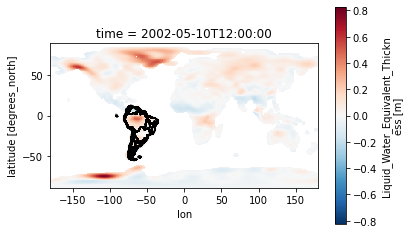

In [40]:
# plot basins on top of netcdf
ax = SA_basins.boundary.plot(edgecolor="black")
csr.lwe_thickness[1].plot(ax=ax,zorder=-1)

In [41]:
# Functions to extract raster value within a shapefile geometry
# solution adapeted from https://stackoverflow.com/questions/51398563/python-mask-netcdf-data-using-shapefile

from rasterio import features
from affine import Affine
import numpy as np


def transform_from_latlon(lat, lon):
    """ input 1D array of lat / lon and output an Affine transformation
    """
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, lat='lat', lon='lon',
              fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.

    usage:
    -----
    1. read shapefile to geopandas.GeoDataFrame
          `states = gpd.read_file(shp_dir+shp_file)`
    2. encode the different shapefiles that capture those lat-lons as different
        numbers i.e. 0.0, 1.0 ... and otherwise np.nan
          `shapes = (zip(states.geometry, range(len(states))))`
    3. Assign this to a new coord in your original xarray.DataArray
          `ds['states'] = rasterize(shapes, ds.coords, longitude='X', latitude='Y')`

    arguments:
    ---------
    : **kwargs (dict): passed to `rasterio.rasterize` function

    attrs:
    -----
    :transform (affine.Affine): how to translate from latlon to ...?
    :raster (numpy.ndarray): use rasterio.features.rasterize fill the values
      outside the .shp file with np.nan
    :spatial_coords (dict): dictionary of {"X":xr.DataArray, "Y":xr.DataArray()}
      with "X", "Y" as keys, and xr.DataArray as values

    returns:
    -------
    :(xr.DataArray): DataArray with `values` of nan for points outside shapefile
      and coords `Y` = latitude, 'X' = longitude.


    """
    transform = transform_from_latlon(coords[lat], coords[lon])
    out_shape = (len(coords[lat]), len(coords[lon]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {lat: coords[lat], lon: coords[lon]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(lat, lon))

def add_shape_coord_from_data_array(xr_da, shp_gpd, coord_name):
    """ Create a new coord for the xr_da indicating whether or not it 
         is inside the shapefile

        Creates a new coord - "coord_name" which will have integer values
         used to subset xr_da for plotting / analysis/

        Usage:
        -----
        precip_da = add_shape_coord_from_data_array(precip_da, "awash.shp", "awash")
        awash_da = precip_da.where(precip_da.awash==0, other=np.nan) 
    """

    # 1. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 2. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               lon='lon', lat='lat')

    return xr_da

In [42]:
# extracting values 
# # whole SA
csr = add_shape_coord_from_data_array(csr, SA_basins, 'basins')
basins_dissolved_csr = csr.where(csr.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

jpl = add_shape_coord_from_data_array(jpl, SA_basins, 'basins')
basins_dissolved_jpl = jpl.where(jpl.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

# whole SA
gfz = add_shape_coord_from_data_array(gfz, SA_basins, 'basins')
basins_dissolved_gfz = gfz.where(gfz.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

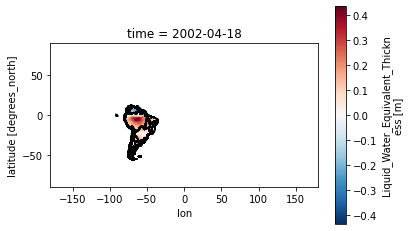

In [43]:
# display

# map
ax = SA_basins.boundary.plot(edgecolor="black")
basins_dissolved_csr.lwe_thickness[0].plot(ax=ax,zorder=-1)


In [ ]:
# study signal
## noise, trend, sine, seasonal patterns, amplitudes, 

In [ ]:
# perform sine fitting with linear fit in LINFIT


In [ ]:
# find lowest and highest 10 months 


In [ ]:
# relate ENSO with GRACE extremes

plots i want to make
line graph with semi transparent bars showing extreme months, same graph should have enso information as well.
in this graph it should be clear where grace starts and where grace-fo begins
enso should be plotted and its extremes maybe in a vertical dashed line in